In [25]:
import pandas as pd

df = pd.read_csv("sensor_data.csv")
print(df.head())

                        Timestamp  Battery  Humidity  Motion  Temperature  \
0  2025-09-24T07:21:05.917210588Z    3.085      65.2   16736        27.15   
1  2025-09-23T20:21:17.471776097Z    3.086      64.9   16589        26.67   
2  2025-09-23T20:44:57.663598018Z    3.085      65.6   16590        26.61   
3  2025-09-23T20:51:17.036753932Z    3.085      65.6   16590        26.60   
4  2025-09-23T21:09:19.761449203Z    3.086      65.6   16591        26.57   

      Activity  
0          NaN  
1  No activity  
2     Activity  
3  No activity  
4     Activity  


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    445 non-null    object 
 1   Battery      445 non-null    float64
 2   Humidity     445 non-null    float64
 3   Motion       445 non-null    int64  
 4   Temperature  445 non-null    float64
 5   Activity     444 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 21.0+ KB
None


In [27]:
#Convert 'Timestamp' to datetime, handling errors by coercing invalid formats to NaT
df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc=True, errors='coerce')


In [28]:
df['Timestamp'] = df['Timestamp'].dt.tz_convert('Africa/Nairobi')


In [29]:
print(df.head())

                            Timestamp  Battery  Humidity  Motion  Temperature  \
0 2025-09-24 10:21:05.917210588+03:00    3.085      65.2   16736        27.15   
1 2025-09-23 23:21:17.471776097+03:00    3.086      64.9   16589        26.67   
2 2025-09-23 23:44:57.663598018+03:00    3.085      65.6   16590        26.61   
3 2025-09-23 23:51:17.036753932+03:00    3.085      65.6   16590        26.60   
4 2025-09-24 00:09:19.761449203+03:00    3.086      65.6   16591        26.57   

      Activity  
0          NaN  
1  No activity  
2     Activity  
3  No activity  
4     Activity  


In [30]:
# Remove the timezone information to make it naive
df['Timestamp'] = df['Timestamp'].dt.tz_localize(None)


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    312 non-null    datetime64[ns]
 1   Battery      445 non-null    float64       
 2   Humidity     445 non-null    float64       
 3   Motion       445 non-null    int64         
 4   Temperature  445 non-null    float64       
 5   Activity     444 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 21.0+ KB
None


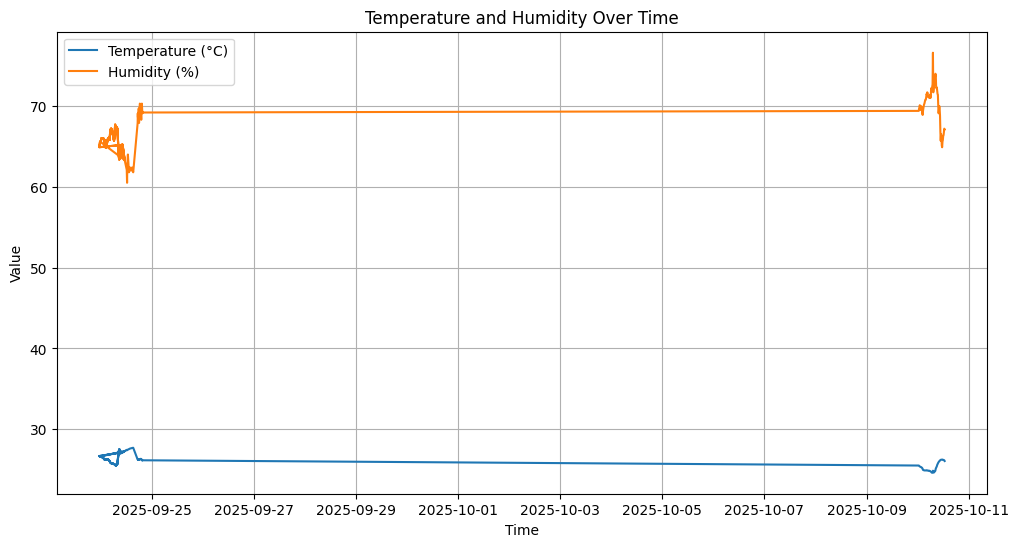

In [32]:
#Sensor readings over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["Timestamp"], df["Temperature"], label="Temperature (°C)")
plt.plot(df["Timestamp"], df["Humidity"], label="Humidity (%)")
#plt.plot(df["Timestamp"], df["Motion"], label="Motion")
plt.legend()
plt.title("Temperature and Humidity Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


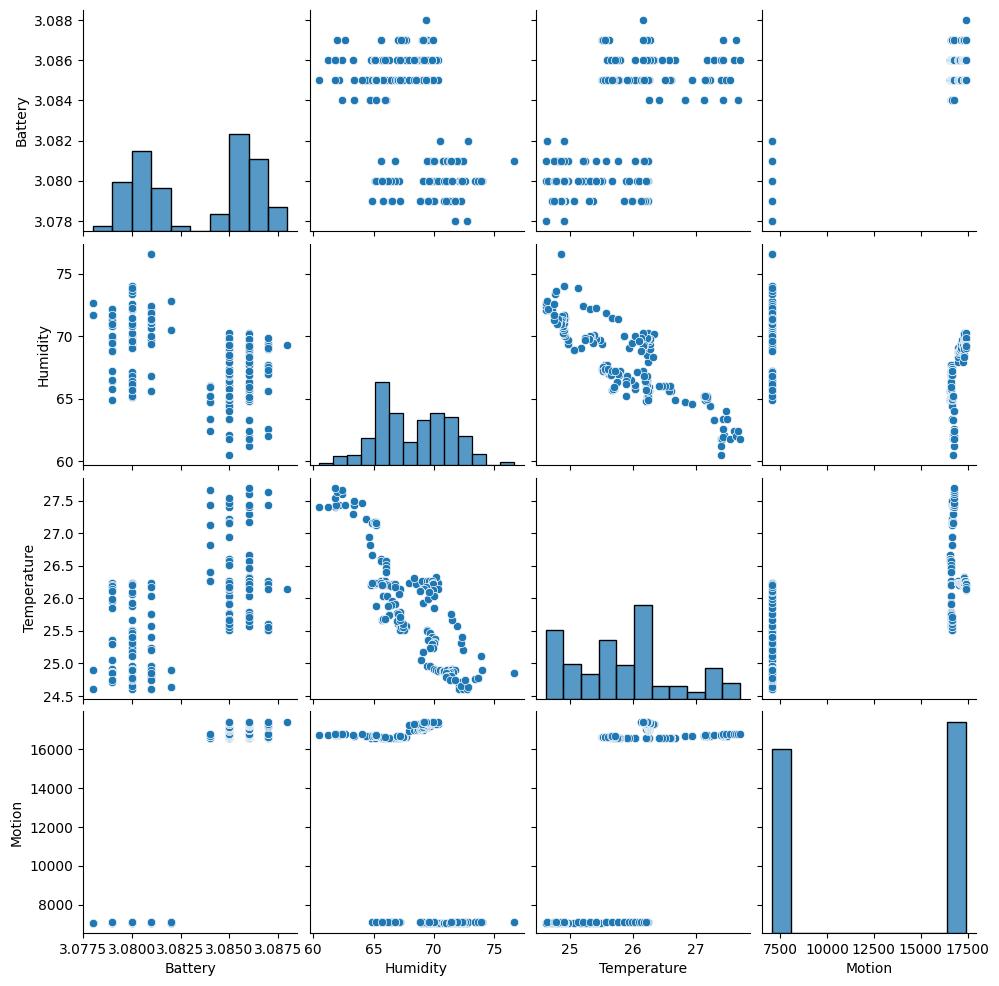

In [33]:
import seaborn as sns

sns.pairplot(df[["Battery", "Humidity", "Temperature", "Motion"]])
plt.show()


In [34]:
# Fill missing 'Activity' with 'No activity' (optional)
df["Activity"] = df["Activity"].fillna("No activity")

In [35]:
print(df.isnull().sum())

Timestamp      133
Battery          0
Humidity         0
Motion           0
Temperature      0
Activity         0
dtype: int64


In [36]:
df = df.dropna()

In [37]:
print(df.isnull().sum())

Timestamp      0
Battery        0
Humidity       0
Motion         0
Temperature    0
Activity       0
dtype: int64


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    312 non-null    datetime64[ns]
 1   Battery      312 non-null    float64       
 2   Humidity     312 non-null    float64       
 3   Motion       312 non-null    int64         
 4   Temperature  312 non-null    float64       
 5   Activity     312 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 17.1+ KB
None


In [39]:
print(df.describe())

                           Timestamp     Battery    Humidity        Motion  \
count                            312  312.000000  312.000000    312.000000   
mean   2025-09-28 03:12:46.876371712    3.084183   67.219231  14461.121795   
min    2025-09-23 23:21:17.471776097    3.078000   60.500000   7064.000000   
25%    2025-09-24 06:21:10.150178816    3.084000   65.500000  16590.000000   
50%    2025-09-24 10:02:24.183013888    3.085000   66.900000  16618.000000   
75%    2025-09-24 19:36:34.266254336    3.086000   69.300000  16695.000000   
max    2025-10-10 12:41:00.045021184    3.088000   76.600000  17440.000000   
std                              NaN    0.002497    2.642970   4130.015773   

       Temperature  
count   312.000000  
mean     26.092917  
min      24.610000  
25%      25.577500  
50%      26.185000  
75%      26.570000  
max      27.700000  
std       0.761279  


In [40]:
print(df["Activity"].value_counts())

Activity
No activity    163
Activity       149
Name: count, dtype: int64


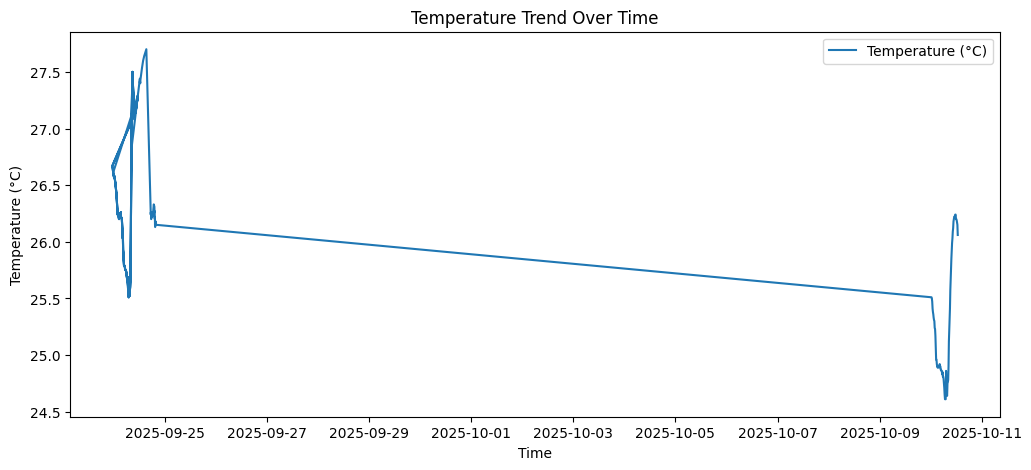

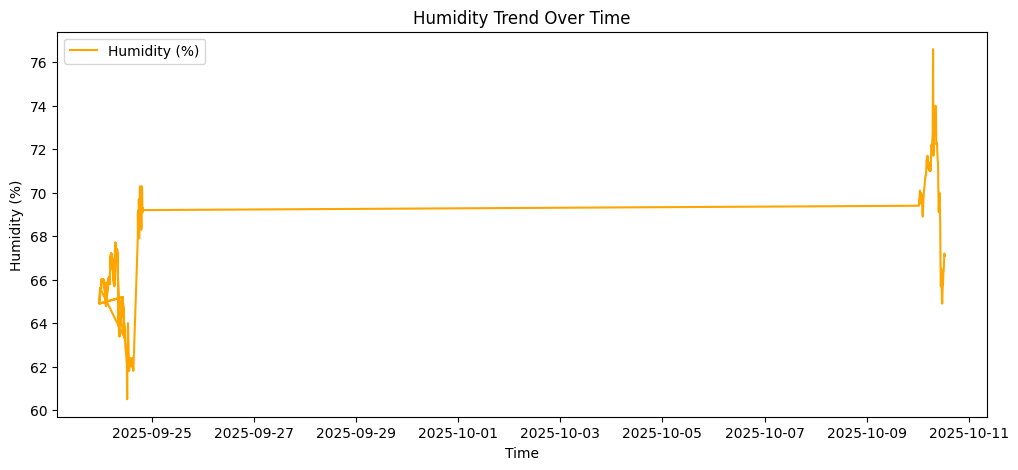

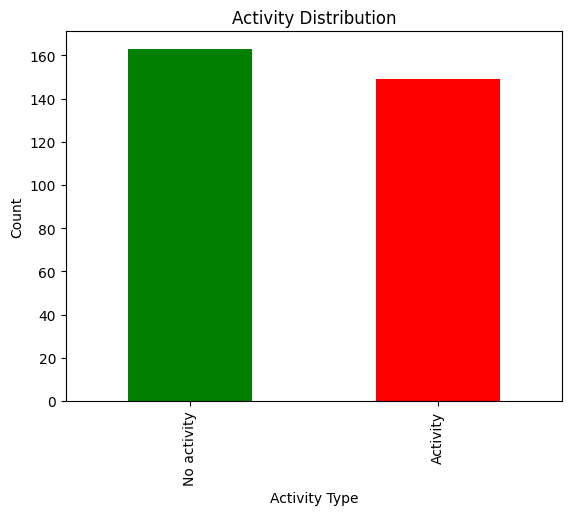

In [41]:
import matplotlib.pyplot as plt

# Temperature trend over time
plt.figure(figsize=(12,5))
plt.plot(df["Timestamp"], df["Temperature"], label="Temperature (°C)")
plt.title("Temperature Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Humidity trend
plt.figure(figsize=(12,5))
plt.plot(df["Timestamp"], df["Humidity"], color='orange', label="Humidity (%)")
plt.title("Humidity Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Humidity (%)")
plt.legend()
plt.show()

# Activity vs No Activity counts
df["Activity"].value_counts().plot(kind="bar", color=["green", "red"])
plt.title("Activity Distribution")
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop Timestamp for now (unless using for time features)
X = df[['Battery', 'Motion', 'Temperature', 'Humidity']].copy()
y_humidity = df['Humidity']
y_temperature = df['Temperature']
y_activity = df['Activity']

# Encode Activity if categorical
le = LabelEncoder()
y_activity = le.fit_transform(y_activity)  # 0 = No Activity, 1 = Activity

# Scale features (helps many models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
#Regression Model to Predict Humidity(usesRandom Forest Regressor)
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_humidity, test_size=0.2, random_state=42
)

# Train model
rf_humidity = RandomForestRegressor(n_estimators=100, random_state=42)
rf_humidity.fit(X_train, y_train)

# Predict
y_pred = rf_humidity.predict(X_test)

# RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Humidity Prediction RMSE:", rmse)

print("Humidity Prediction R2:", r2_score(y_test, y_pred))


Humidity Prediction RMSE: 0.05822834088775514
Humidity Prediction R2: 0.9995074869598187


In [50]:
#Regression Model to Predict Temperature
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_temperature, test_size=0.2, random_state=42
)

# Train model
rf_temperature = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temperature.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf_temperature.predict(X_test)

# RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Temperature Prediction RMSE:", rmse)

print("Temperature Prediction R2:", r2_score(y_test, y_pred))


Temperature Prediction RMSE: 0.016205133421432986
Temperature Prediction R2: 0.9994923686633662


In [51]:
#Classification Model to Predict Activity (using Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features for activity prediction
X = df[['Battery', 'Motion', 'Temperature', 'Humidity']]
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_activity, test_size=0.2, random_state=42
)

# Train model
rf_activity = RandomForestClassifier(n_estimators=100, random_state=42)
rf_activity.fit(X_train, y_train)

# Predict & evaluate
y_pred = rf_activity.predict(X_test)
print("Activity Prediction Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Activity Prediction Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.97      0.94      0.95        32

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63

Confusion Matrix:
 [[30  1]
 [ 2 30]]
